In [1]:
# import all revelant packages
from headers import *
outputFolder = 'output'

In [8]:
f1 = np.transpose(np.genfromtxt('output/Debug/p_fid_z_1683_LCDM.txt'))
f2 = np.transpose(np.genfromtxt('output/Debug/p_fid_z_1683.txt'))
f3 = np.transpose(np.genfromtxt('output/Debug/dPdomega_ncdm_z_1683.txt'))

Text(0, 0.5, '$P_{M_\\nu=0.06}/P_{M_\\nu=0}-1$')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


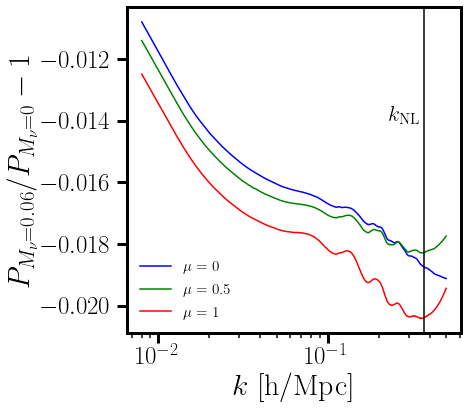

In [26]:
k = f1[0]
plt.figure(figsize=(6,6))
plt.semilogx(k,f2[1]/f1[1]-1.,color='blue',label=r'$\mu=0$')
plt.semilogx(k,f2[2]/f1[2]-1.,color='green',label=r'$\mu=0.5$')
plt.semilogx(k,f2[3]/f1[3]-1.,color='red',label=r'$\mu=1$')
plt.axvline(0.36956576556279763,-2,2,color='k')
plt.text(0.23,-0.014,r'$k_\text{NL}$')
plt.legend(loc='lower left',fontsize='x-small',frameon=False)
plt.xlabel(r'$k$ [h/Mpc]')
plt.ylabel(r'$P_{M_\nu=0.06}/P_{M_\nu=0}-1$')

Text(0, 0.5, '$P_{M_\\nu=0.06}/P_{M_\\nu=0}-1$')

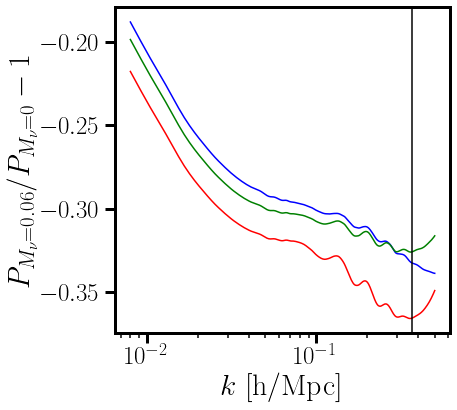

In [25]:
k = f1[0]
plt.figure(figsize=(6,6))
plt.semilogx(k,f3[1]/f2[1],color='blue',label=r'$\mu=0$')
plt.semilogx(k,f3[2]/f2[2],color='green',label=r'$\mu=0.5$')
plt.semilogx(k,f3[3]/f2[3],color='red',label=r'$\mu=1$')
plt.axvline(0.36956576556279763,-2,2,color='k')
#plt.text(0.23,-0.014,r'$k_\text{NL}$')
plt.xlabel(r'$k$ [h/Mpc]')
plt.ylabel(r'$P_{M_\nu=0.06}/P_{M_\nu=0}-1$')

In [6]:
1./np.sqrt(debugCast.Sigma2(1.683))

0.36956576556279763

In [2]:
# Using halofit to estimate the nonlinear matter power spectrum

debugParams = {
          'output': 'mPk',
          'P_k_max_h/Mpc': 40.,
          'non linear':'halofit', 
          'z_pk': '0.0,10',
          'A_s': 2.10732e-9,
          'n_s': 0.96824,
          'alpha_s': 0.,
          'h': 0.6770,
          'N_ur': 1.0196,
          'N_ncdm': 2,
          'm_ncdm': '0.01,0.05',
          'tau_reio': 0.0568,
          'omega_b': 0.02247,
          'omega_cdm': 0.11923,
          'Omega_k': 0.}

debugCosmo = Class()
debugCosmo.set(debugParams)
debugCosmo.compute()

In [3]:
debugExp = experiment(zmin=1.682, zmax=1.684, nbins=1, fsky=0.5, sigma_z=0.0, n=0.1, b=1.5)

In [4]:
debugCast = fisherForecast(experiment=debugExp,cosmo=debugCosmo,params=debugParams,khmin=5.e-4,\
                          khmax=1.,Nk=600,Nmu=200,velocileptors=True,name='Debug')

In [5]:
k = np.linspace(0.008,0.5,400)
fiducial_p = debugCast.P_fid[0]
result0 = [k]
result0.append(debugCast.get_f_at_fixed_mu(fiducial_p,0.)(k))
result0.append(debugCast.get_f_at_fixed_mu(fiducial_p,0.5)(k))
result0.append(debugCast.get_f_at_fixed_mu(fiducial_p,1.)(k))
result0 = np.array(result0)

from tabulate import tabulate
headers = list(np.array(['k [h/Mpc]', 'mu=0', 'mu=0.5', 'mu=1']))
table0 = tabulate(np.transpose(result0),headers)

file = open('output/Debug/p_fid_z_1683_LCDM.txt','w')
file.write(table0)
file.close()

In [5]:
debugCast.marg_params = np.array(['m_ncdm'])

In [6]:
debugCast.compute_derivatives()

In [19]:
debugCast.compute_derivatives(parameters=np.array(['m_ncdm']), z=np.array([1.683]))

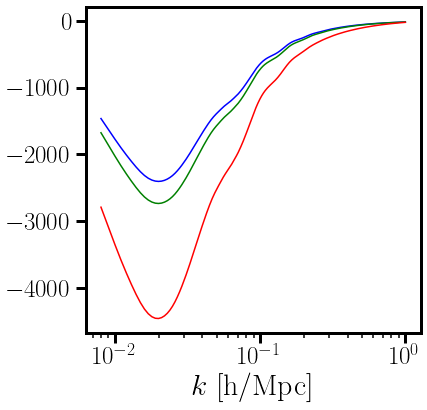

m_ncdm_200.txt


<Figure size 432x288 with 0 Axes>

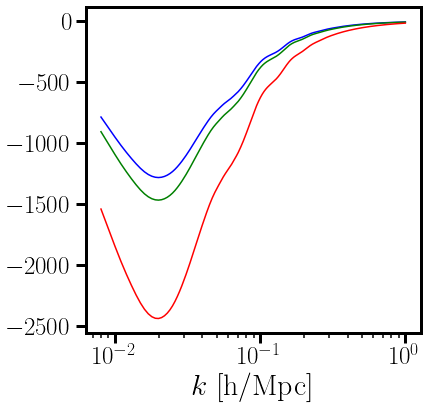

m_ncdm_300.txt


<Figure size 432x288 with 0 Axes>

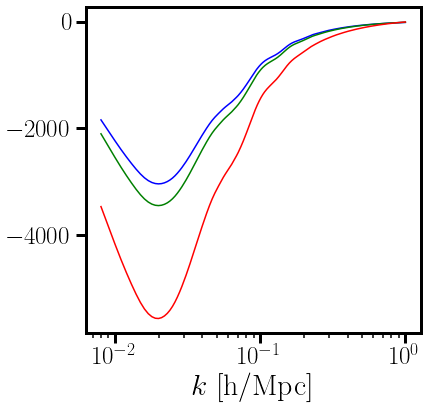

m_ncdm_168.txt


<Figure size 432x288 with 0 Axes>

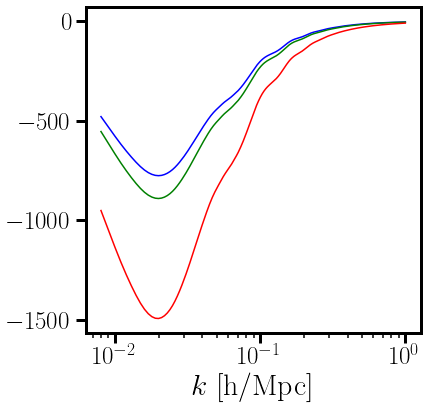

m_ncdm_400.txt


<Figure size 432x288 with 0 Axes>

In [20]:
debugCast.check_derivatives()

In [8]:
dpdp2 = np.genfromtxt('output/Debug/derivatives/m_ncdm_200.txt')

In [9]:
dpdp3 = np.genfromtxt('output/Debug/derivatives/m_ncdm_300.txt')

In [21]:
#dpdp4 = np.genfromtxt('output/Debug/derivatives/m_ncdm_400.txt')
dpdp4 = np.genfromtxt('output/Debug/derivatives/m_ncdm_168.txt')

In [22]:
k = np.linspace(0.008,0.5,400)

In [23]:
result2, result3, result4 = [k],[k],[k]

In [24]:
result2.append(debugCast.get_f_at_fixed_mu(dpdp2,0.)(k))
result2.append(debugCast.get_f_at_fixed_mu(dpdp2,0.5)(k))
result2.append(debugCast.get_f_at_fixed_mu(dpdp2,1.)(k))

result3.append(debugCast.get_f_at_fixed_mu(dpdp3,0.)(k))
result3.append(debugCast.get_f_at_fixed_mu(dpdp3,0.5)(k))
result3.append(debugCast.get_f_at_fixed_mu(dpdp3,1.)(k))

result4.append(debugCast.get_f_at_fixed_mu(dpdp4,0.)(k))
result4.append(debugCast.get_f_at_fixed_mu(dpdp4,0.5)(k))
result4.append(debugCast.get_f_at_fixed_mu(dpdp4,1.)(k))

In [25]:
result2 = np.array(result2)
result3 = np.array(result3)
result4 = np.array(result4)

In [26]:
from tabulate import tabulate
headers = list(np.array(['k [h/Mpc]', 'mu=0', 'mu=0.5', 'mu=1']))
table2 = tabulate(np.transpose(result2),headers)
table3 = tabulate(np.transpose(result3),headers)
table4 = tabulate(np.transpose(result4),headers)

file = open('output/Debug/dPdomega_ncdm_z_2.txt','w')
file.write(table2)
file.close()

file = open('output/Debug/dPdomega_ncdm_z_3.txt','w')
file.write(table3)
file.close()

file = open('output/Debug/dPdomega_ncdm_z_4.txt','w')
file.write(table4)
file.close()

## Setting parameters to match Emanuele

In [2]:
params = {
          'output': 'mPk,mTk',
          'P_k_max_h/Mpc': 100.,
          #'non linear' : 'HMCode',
          #'non linear' : 'halofit',
          'z_pk': '0.0,10',
          'A_s': 2.10732e-9,
          'n_s': 0.96824,
          'h': 0.6770,
          'omega_b': 0.02247,
          'omega_cdm': 0.11923}

cosmo = Class()
cosmo.set(params)
cosmo.compute()

The experiment has noise $N = 1000 \text{ [Mpc/h]}^3$, which corresponds to $n = 0.001 \text{ [h/Mpc]}^{3}$. I'm evaluating the power spectrum at $z=1$, so I choose to have one redshift bin centered about $1$. I'm setting the bias to $b=1.5$.

In [3]:
exp = experiment(zmin=0.8,zmax=1.2,n=1e-3,nbins=1,sigma_z=0.,b=1.5)

I'm marginalizing over the parameters $\Omega_b, \Omega_c, h, \log(A_s), n_s, b, \text{ and }N$. I'm setting $k_\text{min}=2\times10^{-3}\text{ h/Mpc}$ and $k_\text{max} = 0.2\text{ h/Mpc}$. I'm splitting the integral up into 200 $k$ and $\mu$ bins.

In [4]:
fishcast = fisherForecast(experiment=exp,cosmo=cosmo,params=params,khmin=1.e-3,khmax=0.2,Nk=7000,Nmu=1000)
fishcast.marg_params = np.array(['omega_b','omega_cdm','h','log(A_s)','n_s','b','N'])

To be consistent with Emanuele, I'm setting the volume to be exactly  $22.2 \text{ [Gpc/h]}^3$.

In [5]:
fishcast.Vsurvey = np.array([2.22e10])

## Checking $\Delta b(k)$ with Simo

In [6]:
z=1.
pmatter = compute_matter_power_spectrum(fishcast, z)
D = 0.76 * fishcast.cosmo.scale_independent_growth_factor(z) # normalized so D(a) = a in the MD era
# hacky way of calculating the transfer function
T = np.sqrt(pmatter/fishcast.k**fishcast.params['n_s'])
T /= T[0]
fNL_factor = 3.*1.68*(1.5-1.)*(fishcast.params['omega_cdm']/fishcast.params['h']**2.)*100.**2.
fNL_factor /= D * fishcast.k**2. * T * 299792.458**2.

In [7]:
delta_b = fishcast.get_f_at_fixed_mu(fNL_factor,0.)

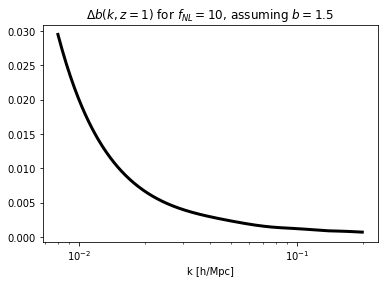

In [8]:
kk = np.linspace(8.e-3,0.199,1000)
plt.semilogx(kk,10.*delta_b(kk),c='k',lw=3)
plt.title(r'$\Delta b(k,z=1)$ for $f_{NL}=10$, assuming $b=1.5$')
plt.xlabel('k [h/Mpc]')
plt.savefig('output/delta_b.pdf',bbox_inches='tight')

In [9]:
from tabulate import tabulate
table = tabulate(np.transpose(np.array([kk,10.*delta_b(kk)])),['k [h/Mpc]', 'delta b'])
file = open(outputFolder+'/delta_b.dat','w')
file.write(table)
file.close()

## Calculating power spectra and derivatives

In [10]:
# Derivatives of the matter power spectrum at z=0
data = np.genfromtxt(outputFolder+'/derivatives_dark_matter_z0p0_PlanckBAO.dat')
EmanK_matter_0 = np.array([data[i][0] for i in range(len(data))])
Eman_dPdomega_b_matter_0 = np.array([data[i][1] for i in range(len(data))])
Eman_dPdomega_b_matter_0 = interp1d(EmanK_matter_0,Eman_dPdomega_b_matter_0,kind='linear')
Eman_dPdomega_cdm_matter_0 = np.array([data[i][2] for i in range(len(data))])
Eman_dPdomega_cdm_matter_0 = interp1d(EmanK_matter_0,Eman_dPdomega_cdm_matter_0,kind='linear')
Eman_dPdh_matter_0 = np.array([data[i][3] for i in range(len(data))])
Eman_dPdh_matter_0 = interp1d(EmanK_matter_0,Eman_dPdh_matter_0,kind='linear')
Eman_p_fid_matter_0 = np.array([data[i][4] for i in range(len(data))])
Eman_p_fid_matter_0 = interp1d(EmanK_matter_0,Eman_p_fid_matter_0,kind='linear')
Eman_dPdn_s_matter_0 = np.array([data[i][5] for i in range(len(data))])
Eman_dPdn_s_matter_0 = interp1d(EmanK_matter_0,Eman_dPdn_s_matter_0,kind='linear')

# Fiducial galaxy power spectrum at z=1,mu=0
data = np.genfromtxt(outputFolder+'/Pgg_mu0p0_z1p0_b1p5_PlanckBAO18.dat')
EmanK_galaxy_1 = np.array([data[i][0] for i in range(len(data))])
# scaled by b^2 
Eman_p_fid_galaxy_1 = np.array([data[i][1] for i in range(len(data))]) * 2.25
Eman_p_fid_galaxy_1 = interp1d(EmanK_galaxy_1,Eman_p_fid_galaxy_1,kind='linear')

# Derivatives of the galay power spectrum at z=1,mu=0
data = np.genfromtxt(outputFolder+'/derivatives_mu0p0_z1p0_b1p5_N1e3_V22p2e9_PlanckBAO18_kmax0p2.dat')
EmanK_galaxy_1_0 = np.array([data[i][0] for i in range(len(data))])
Eman_dlnPdomega_b_galaxy_1_0  = np.array([data[i][1] for i in range(len(data))])
Eman_dlnPdomega_b_galaxy_1_0 = interp1d(EmanK_galaxy_1_0,Eman_dlnPdomega_b_galaxy_1_0,kind='linear')
Eman_dlnPdomega_cdm_galaxy_1_0  = np.array([data[i][2] for i in range(len(data))])
Eman_dlnPdomega_cdm_galaxy_1_0  = interp1d(EmanK_galaxy_1_0,Eman_dlnPdomega_cdm_galaxy_1_0 ,kind='linear')
Eman_dlnPdh_galaxy_1_0  = np.array([data[i][3] for i in range(len(data))])
Eman_dlnPdh_galaxy_1_0 = interp1d(EmanK_galaxy_1_0,Eman_dlnPdh_galaxy_1_0,kind='linear')
Eman_dlnPdlogA_s_galaxy_1_0 = np.array([data[i][4] for i in range(len(data))])
Eman_dlnPdlogA_s_galaxy_1_0 = interp1d(EmanK_galaxy_1_0,Eman_dlnPdlogA_s_galaxy_1_0,kind='linear')
Eman_dlnPdn_s_galaxy_1_0  = np.array([data[i][5] for i in range(len(data))])
Eman_dlnPdn_s_galaxy_1_0 = interp1d(EmanK_galaxy_1_0,Eman_dlnPdn_s_galaxy_1_0,kind='linear')

# Derivatives of the galay power spectrum at z=1,mu=0.5
data = np.genfromtxt(outputFolder+'/derivatives_mu0p5_z1p0_b1p5_N1e3_V22p2e9_PlanckBAO18_kmax0p2.dat')
EmanK_galaxy_1_5 = np.array([data[i][0] for i in range(len(data))])
Eman_dlnPdomega_b_galaxy_1_5  = np.array([data[i][1] for i in range(len(data))])
Eman_dlnPdomega_b_galaxy_1_5 = interp1d(EmanK_galaxy_1_5,Eman_dlnPdomega_b_galaxy_1_5,kind='linear')
Eman_dlnPdomega_cdm_galaxy_1_5  = np.array([data[i][2] for i in range(len(data))])
Eman_dlnPdomega_cdm_galaxy_1_5  = interp1d(EmanK_galaxy_1_5,Eman_dlnPdomega_cdm_galaxy_1_5 ,kind='linear')
Eman_dlnPdh_galaxy_1_5  = np.array([data[i][3] for i in range(len(data))])
Eman_dlnPdh_galaxy_1_5 = interp1d(EmanK_galaxy_1_5,Eman_dlnPdh_galaxy_1_5,kind='linear')
Eman_dlnPdlogA_s_galaxy_1_5 = np.array([data[i][4] for i in range(len(data))])
Eman_dlnPdlogA_s_galaxy_1_5 = interp1d(EmanK_galaxy_1_5,Eman_dlnPdlogA_s_galaxy_1_5,kind='linear')
Eman_dlnPdn_s_galaxy_1_5  = np.array([data[i][5] for i in range(len(data))])
Eman_dlnPdn_s_galaxy_1_5 = interp1d(EmanK_galaxy_1_5,Eman_dlnPdn_s_galaxy_1_5,kind='linear')

# Derivatives of the galay power spectrum at z=1,mu=1
data = np.genfromtxt(outputFolder+'/derivatives_mu1p0_z1p0_b1p5_N1e3_V22p2e9_PlanckBAO18_kmax0p2.dat')
EmanK_galaxy_1_1 = np.array([data[i][0] for i in range(len(data))])
Eman_dlnPdomega_b_galaxy_1_1  = np.array([data[i][1] for i in range(len(data))])
Eman_dlnPdomega_b_galaxy_1_1 = interp1d(EmanK_galaxy_1_1,Eman_dlnPdomega_b_galaxy_1_1,kind='linear')
Eman_dlnPdomega_cdm_galaxy_1_1  = np.array([data[i][2] for i in range(len(data))])
Eman_dlnPdomega_cdm_galaxy_1_1  = interp1d(EmanK_galaxy_1_1,Eman_dlnPdomega_cdm_galaxy_1_1 ,kind='linear')
Eman_dlnPdh_galaxy_1_1  = np.array([data[i][3] for i in range(len(data))])
Eman_dlnPdh_galaxy_1_1 = interp1d(EmanK_galaxy_1_1,Eman_dlnPdh_galaxy_1_1,kind='linear')
Eman_dlnPdlogA_s_galaxy_1_1 = np.array([data[i][4] for i in range(len(data))])
Eman_dlnPdlogA_s_galaxy_1_1 = interp1d(EmanK_galaxy_1_1,Eman_dlnPdlogA_s_galaxy_1_1,kind='linear')
Eman_dlnPdn_s_galaxy_1_1  = np.array([data[i][5] for i in range(len(data))])
Eman_dlnPdn_s_galaxy_1_1 = interp1d(EmanK_galaxy_1_1,Eman_dlnPdn_s_galaxy_1_1,kind='linear')

In [11]:
# Derivatives of the matter power spectrum at z=0
Noah_dPdomega_b_matter_0 = fishcast.compute_dPdp('omega_b',0.,five_point=True)/(1.5**2.)
Noah_dPdomega_b_matter_0 = fishcast.get_f_at_fixed_mu(Noah_dPdomega_b_matter_0,0.)
Noah_dPdomega_cdm_matter_0 = fishcast.compute_dPdp('omega_cdm',0.,five_point=True)/(1.5**2.)
Noah_dPdomega_cdm_matter_0 = fishcast.get_f_at_fixed_mu(Noah_dPdomega_cdm_matter_0,0.)
Noah_dPdh_matter_0 = fishcast.compute_dPdp('h',0.,five_point=True)/(1.5**2.)
Noah_dPdh_matter_0 = fishcast.get_f_at_fixed_mu(Noah_dPdh_matter_0,0.)
Noah_p_fid_matter_0 = fishcast.compute_dPdp('log(A_s)',0.,five_point=True)/(1.5**2.)
Noah_p_fid_matter_0 = fishcast.get_f_at_fixed_mu(Noah_p_fid_matter_0,0.)
Noah_dPdn_s_matter_0 = fishcast.compute_dPdp('n_s',0.,five_point=True)/(1.5**2.)
Noah_dPdn_s_matter_0 = fishcast.get_f_at_fixed_mu(Noah_dPdn_s_matter_0,0.)

# Fiducial matter power spectrum at z=1
Noah_p_fid_matter_1 = fishcast.compute_dPdp('log(A_s)',1.,five_point=True)/(1.5**2.)
Noah_p_fid_matter_1 = fishcast.get_f_at_fixed_mu(Noah_p_fid_matter_1,0.)

# Derivatives of the galaxy power spectrum at z=0,mu=0
Noah_dPdomega_b_galaxy_0 = lambda k: Noah_dPdomega_b_matter_0(k) * (1.5)**2.
Noah_dPdomega_cdm_galaxy_0 = lambda k: Noah_dPdh_matter_0(k) * (1.5)**2.
Noah_dPdh_galaxy_0 = lambda k: Noah_dPdh_matter_0(k) * (1.5)**2.
Noah_p_fid_galaxy_0 = lambda k: Noah_p_fid_matter_0(k) * (1.5)**2.
Noah_dPdn_s_galaxy_0 = lambda k: Noah_dPdn_s_matter_0(k) * (1.5)**2.

# Derivatives of the galaxy power spectrum at z=1
Noah_dPdomega_b_galaxy_1_brute = fishcast.compute_dPdp('omega_b',1.,five_point=True)
Noah_dPdomega_cdm_galaxy_1_brute = fishcast.compute_dPdp('omega_cdm',1.,five_point=True)
Noah_dPdh_galaxy_1_brute = fishcast.compute_dPdp('h',1.,five_point=True)
Noah_p_fid_galaxy_1 = fishcast.compute_dPdp('log(A_s)',1.,five_point=True)
Noah_dPdn_s_galaxy_1_brute = fishcast.compute_dPdp('n_s',1.,five_point=True)
# mu=0
Noah_dPdomega_b_galaxy_1_0_brute = fishcast.get_f_at_fixed_mu(Noah_dPdomega_b_galaxy_1_brute,0.)
Noah_dPdomega_cdm_galaxy_1_0_brute = fishcast.get_f_at_fixed_mu(Noah_dPdomega_cdm_galaxy_1_brute,0.)
Noah_dPdh_galaxy_1_0_brute = fishcast.get_f_at_fixed_mu(Noah_dPdh_galaxy_1_brute,0.)
Noah_p_fid_galaxy_1_0 = fishcast.get_f_at_fixed_mu(Noah_p_fid_galaxy_1,0.)
Noah_dPdn_s_galaxy_1_0_brute = fishcast.get_f_at_fixed_mu(Noah_dPdn_s_galaxy_1_brute,0.)
# mu=0.5
Noah_dPdomega_b_galaxy_1_5_brute = fishcast.get_f_at_fixed_mu(Noah_dPdomega_b_galaxy_1_brute,.5)
Noah_dPdomega_cdm_galaxy_1_5_brute = fishcast.get_f_at_fixed_mu(Noah_dPdomega_cdm_galaxy_1_brute,.5)
Noah_dPdh_galaxy_1_5_brute = fishcast.get_f_at_fixed_mu(Noah_dPdh_galaxy_1_brute,.5)
Noah_p_fid_galaxy_1_5 = fishcast.get_f_at_fixed_mu(Noah_p_fid_galaxy_1,.5)
Noah_dPdn_s_galaxy_1_5_brute = fishcast.get_f_at_fixed_mu(Noah_dPdn_s_galaxy_1_brute,.5)
# mu=1.
Noah_dPdomega_b_galaxy_1_1_brute = fishcast.get_f_at_fixed_mu(Noah_dPdomega_b_galaxy_1_brute,1.)
Noah_dPdomega_cdm_galaxy_1_1_brute = fishcast.get_f_at_fixed_mu(Noah_dPdomega_cdm_galaxy_1_brute,1.)
Noah_dPdh_galaxy_1_1_brute = fishcast.get_f_at_fixed_mu(Noah_dPdh_galaxy_1_brute,1.)
Noah_p_fid_galaxy_1_1 = fishcast.get_f_at_fixed_mu(Noah_p_fid_galaxy_1,1.)
Noah_dPdn_s_galaxy_1_1_brute = fishcast.get_f_at_fixed_mu(Noah_dPdn_s_galaxy_1_brute,1.)

## Matter power spectrum at z=0

They agree!

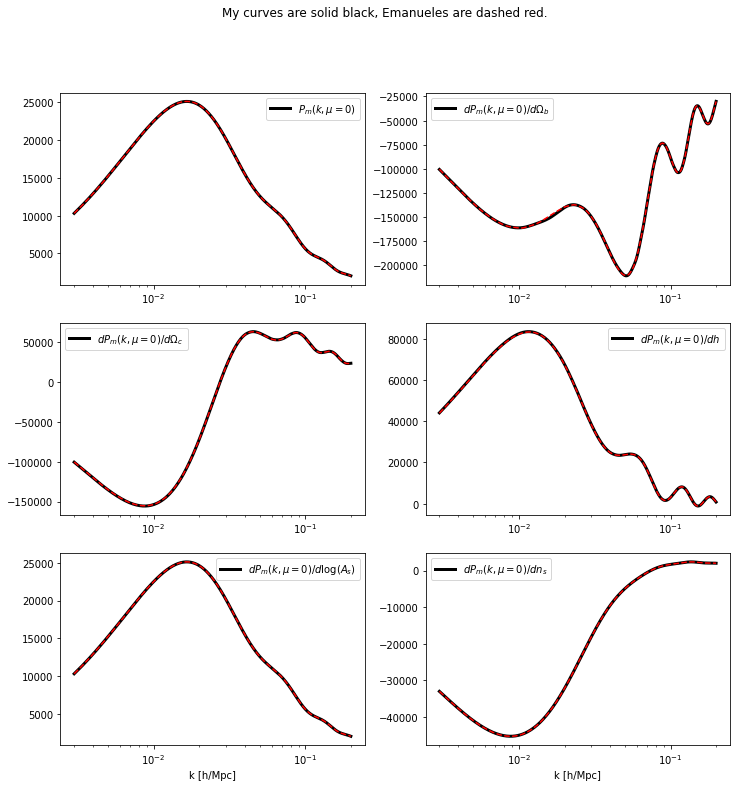

In [12]:
kk = np.linspace(3.e-3,0.199,1000)

fig, axs = plt.subplots(3, 2,figsize=(12,12))
axs[0,0].semilogx(kk,Noah_p_fid_matter_0(kk),c='k',label=r'$P_m(k,\mu=0)$',lw=3.)
axs[0,0].semilogx(kk,Eman_p_fid_matter_0(kk),c='r',ls='--')

axs[0,1].semilogx(kk,Noah_dPdomega_b_matter_0(kk),c='k',label=r'$dP_m(k,\mu=0)/d\Omega_b$',lw=3.)
axs[0,1].semilogx(kk,Eman_dPdomega_b_matter_0(kk),c='r',ls='--')

axs[1,0].semilogx(kk,Noah_dPdomega_cdm_matter_0(kk),c='k',label=r'$dP_m(k,\mu=0)/d\Omega_c$',lw=3.)
axs[1,0].semilogx(kk,Eman_dPdomega_cdm_matter_0(kk),c='r',ls='--')

axs[1,1].semilogx(kk,Noah_dPdh_matter_0(kk),c='k',label=r'$dP_m(k,\mu=0)/dh$',lw=3.)
axs[1,1].semilogx(kk,Eman_dPdh_matter_0(kk),c='r',ls='--')

axs[2,0].semilogx(kk,Noah_p_fid_matter_0(kk),c='k',label=r'$dP_m(k,\mu=0)/d\log(A_s)$',lw=3.)
axs[2,0].semilogx(kk,Eman_p_fid_matter_0(kk),c='r',ls='--')

axs[2,1].semilogx(kk,Noah_dPdn_s_matter_0(kk),c='k',label=r'$dP_m(k,\mu=0)/dn_s$',lw=3.)
axs[2,1].semilogx(kk,Eman_dPdn_s_matter_0(kk),c='r',ls='--')

axs[0,0].legend(loc=0.)
axs[0,1].legend(loc=0.)
axs[1,0].legend(loc=0.)
axs[1,1].legend(loc=0.)
axs[2,0].legend(loc=0.)
axs[2,1].legend(loc=0.)

axs[2,0].set_xlabel('k [h/Mpc]')
axs[2,1].set_xlabel('k [h/Mpc]')

fig.suptitle(r'My curves are solid black, Emanueles are dashed red.')
plt.savefig('output/matter_power_spectrum_z0.pdf')

## Galaxy power spectrum at z=1

They agree!

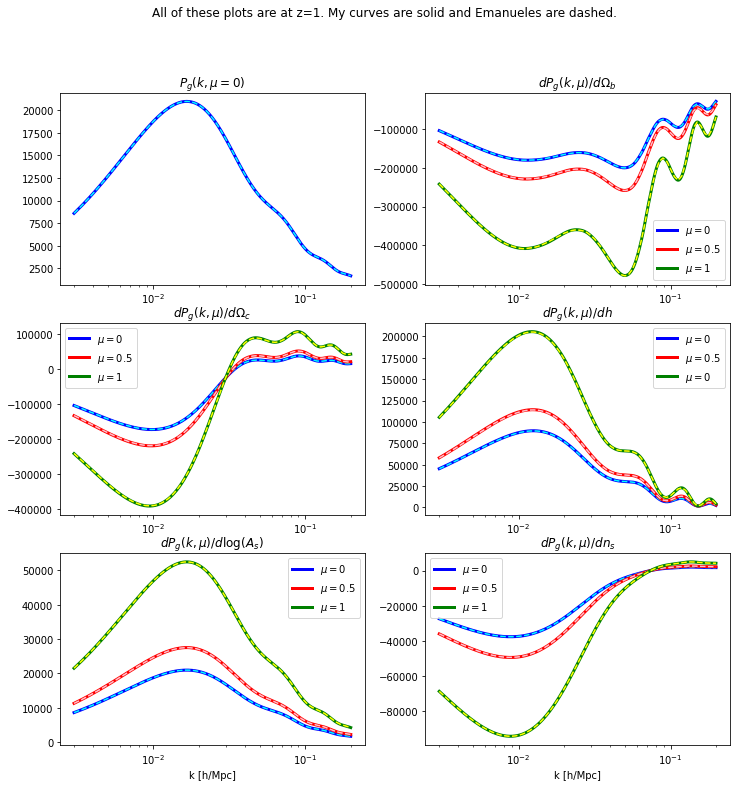

In [13]:
fig, axs = plt.subplots(3, 2,figsize=(12,12))
axs[0,0].semilogx(kk,Noah_p_fid_galaxy_1_0(kk),c='b',lw=3.)
axs[0,0].semilogx(kk,Eman_p_fid_galaxy_1(kk),c='cyan',ls='--')
axs[0,0].set_title(r'$P_g(k,\mu=0)$')

axs[0,1].semilogx(kk,Noah_dPdomega_b_galaxy_1_0_brute(kk),c='b',lw=3.,label=r'$\mu=0$')
axs[0,1].semilogx(kk,Eman_dlnPdomega_b_galaxy_1_0(kk)*Eman_p_fid_galaxy_1(kk),c='cyan',ls='--')
axs[0,1].semilogx(kk,Noah_dPdomega_b_galaxy_1_5_brute(kk),c='r',lw=3.,label=r'$\mu=0.5$')
axs[0,1].semilogx(kk,Eman_dlnPdomega_b_galaxy_1_5(kk),c='pink',ls='--')
axs[0,1].semilogx(kk,Noah_dPdomega_b_galaxy_1_1_brute(kk),c='g',lw=3.,label=r'$\mu=1$')
axs[0,1].semilogx(kk,Eman_dlnPdomega_b_galaxy_1_1(kk),c='yellow',ls='--')
axs[0,1].set_title(r'$dP_g(k,\mu)/d\Omega_b$')

axs[1,0].semilogx(kk,Noah_dPdomega_cdm_galaxy_1_0_brute(kk),c='b',lw=3.,label=r'$\mu=0$')
axs[1,0].semilogx(kk,Eman_dlnPdomega_cdm_galaxy_1_0(kk)*Eman_p_fid_galaxy_1(kk),c='cyan',ls='--')
axs[1,0].semilogx(kk,Noah_dPdomega_cdm_galaxy_1_5_brute(kk),c='r',lw=3.,label=r'$\mu=0.5$')
axs[1,0].semilogx(kk,Eman_dlnPdomega_cdm_galaxy_1_5(kk),c='pink',ls='--')
axs[1,0].semilogx(kk,Noah_dPdomega_cdm_galaxy_1_1_brute(kk),c='g',lw=3.,label=r'$\mu=1$')
axs[1,0].semilogx(kk,Eman_dlnPdomega_cdm_galaxy_1_1(kk),c='yellow',ls='--')
axs[1,0].set_title(r'$dP_g(k,\mu)/d\Omega_c$')

axs[1,1].semilogx(kk,Noah_dPdh_galaxy_1_0_brute(kk),c='b',lw=3.,label=r'$\mu=0$')
axs[1,1].semilogx(kk,Eman_dlnPdh_galaxy_1_0(kk)*Eman_p_fid_galaxy_1(kk),c='cyan',ls='--')
axs[1,1].semilogx(kk,Noah_dPdh_galaxy_1_5_brute(kk),c='r',lw=3.,label=r'$\mu=0.5$')
axs[1,1].semilogx(kk,Eman_dlnPdh_galaxy_1_5(kk),c='pink',ls='--')
axs[1,1].semilogx(kk,Noah_dPdh_galaxy_1_1_brute(kk),c='g',lw=3.,label=r'$\mu=0$')
axs[1,1].semilogx(kk,Eman_dlnPdh_galaxy_1_1(kk),c='yellow',ls='--')
axs[1,1].set_title(r'$dP_g(k,\mu)/dh$')

axs[2,0].semilogx(kk,Noah_p_fid_galaxy_1_0(kk),c='b',lw=3.,label=r'$\mu=0$')
axs[2,0].semilogx(kk,Eman_dlnPdlogA_s_galaxy_1_0(kk)*Eman_p_fid_galaxy_1(kk),c='cyan',ls='--')
axs[2,0].semilogx(kk,Noah_p_fid_galaxy_1_5(kk),c='r',lw=3.,label=r'$\mu=0.5$')
axs[2,0].semilogx(kk,Eman_dlnPdlogA_s_galaxy_1_5(kk),c='pink',ls='--')
axs[2,0].semilogx(kk,Noah_p_fid_galaxy_1_1(kk),c='g',lw=3.,label=r'$\mu=1$')
axs[2,0].semilogx(kk,Eman_dlnPdlogA_s_galaxy_1_1(kk),c='yellow',ls='--')
axs[2,0].set_title(r'$dP_g(k,\mu)/d\log(A_s)$')

axs[2,1].semilogx(kk,Noah_dPdn_s_galaxy_1_0_brute(kk),c='b',lw=3.,label=r'$\mu=0$')
axs[2,1].semilogx(kk,Eman_dlnPdn_s_galaxy_1_0(kk)*Eman_p_fid_galaxy_1(kk),c='cyan',ls='--')
axs[2,1].semilogx(kk,Noah_dPdn_s_galaxy_1_5_brute(kk),c='r',lw=3.,label=r'$\mu=0.5$')
axs[2,1].semilogx(kk,Eman_dlnPdn_s_galaxy_1_5(kk),c='pink',ls='--')
axs[2,1].semilogx(kk,Noah_dPdn_s_galaxy_1_1_brute(kk),c='g',lw=3.,label=r'$\mu=1$')
axs[2,1].semilogx(kk,Eman_dlnPdn_s_galaxy_1_1(kk),c='yellow',ls='--')

axs[2,1].set_title(r'$dP_g(k,\mu)/dn_s$')

axs[0,1].legend(loc=0.)
axs[1,0].legend(loc=0.)
axs[1,1].legend(loc=0.)
axs[2,0].legend(loc=0.)
axs[2,1].legend(loc=0.)

axs[2,0].set_xlabel('k [h/Mpc]')
axs[2,1].set_xlabel('k [h/Mpc]')

fig.suptitle('All of these plots are at z=1. My curves are solid and Emanueles are dashed.')
plt.savefig('output/galaxy_power_spectrum_z1.pdf')

## Comparing Fisher matrices

In [14]:
F = fishcast.compute_Fisher_matrix()

This is the Fisher matrix that Emanuele gets.

In [15]:
G = np.genfromtxt(outputFolder+'/Fisher_z1p0_b1p5_N1e3_V22p2e9_PlanckBAO18_kmax0p2.dat')

And here's the ratio of our forecasts.

In [16]:
from tabulate import tabulate
headers = list(fishcast.marg_params.copy())
table = tabulate(G/F,headers)
file = open(outputFolder+'/Fisher_ratio.dat','w')
file.write(table)
file.close()

print(table)

  omega_b    omega_cdm         h    log(A_s)       n_s         b         N
---------  -----------  --------  ----------  --------  --------  --------
 0.9984       0.995769  0.998807    0.998427  0.997788  0.998462  0.997965
 0.995769     0.993565  0.995543    0.995883  0.995444  0.995924  0.995534
 0.998807     0.995543  0.999451    0.998346  0.998455  0.99837   0.998491
 0.998427     0.995883  0.998346    0.998424  0.997854  0.998464  0.998029
 0.997788     0.995444  0.998455    0.997854  0.997498  0.997897  0.997531
 0.998462     0.995924  0.99837     0.998464  0.997897  0.998476  0.998019
 0.997965     0.995534  0.998491    0.998029  0.997531  0.998019  1.07598


In [17]:
Finv = np.linalg.inv(F)
Ginv = np.linalg.inv(G)

In [18]:
table2 = tabulate(Ginv/Finv,headers)
print(table2)

  omega_b    omega_cdm         h    log(A_s)        n_s          b         N
---------  -----------  --------  ----------  ---------  ---------  --------
 0.762446     0.756011  0.759139    0.774172   0.716865   4.03374   0.176444
 0.756011     0.75157   0.75372     0.770582   0.71381    4.04526   0.1767
 0.759139     0.75372   0.756485    0.772167   0.715476   3.92315   0.175775
 0.774172     0.770582  0.772167    0.789049   0.735014   2.57923   0.174261
 0.716865     0.71381   0.715476    0.735014   0.675684  14.037     0.179111
 4.03374      4.04526   3.92315     2.57923   14.037      0.732404  0.190614
 0.176444     0.1767    0.175775    0.174261   0.179111   0.190614  0.186046


In [19]:
Fsub = F[:-1,:-1]
Gsub = G[:-1,:-1]
Fsubinv = np.linalg.inv(Fsub)
Gsubinv = np.linalg.inv(Gsub)

In [20]:
table3 = tabulate(Gsubinv/Fsubinv,headers[:-1])
print(table3)

  omega_b    omega_cdm        h    log(A_s)      n_s        b
---------  -----------  -------  ----------  -------  -------
  1.04041      1.04085  1.03671     1.03463  1.04619  1.05412
  1.04085      1.0408   1.03693     1.03447  1.04562  1.05271
  1.03671      1.03693  1.03288     1.03066  1.04204  1.04987
  1.03463      1.03447  1.03066     1.02807  1.03921  1.04366
  1.04619      1.04562  1.04204     1.03921  1.04981  1.05625
  1.05412      1.05271  1.04987     1.04366  1.05625  1.03077


In [21]:
fishcast.dk

array([7.57297230e-07, 7.57297230e-07, 7.57297230e-07, ...,
       1.51344833e-04, 1.51344833e-04, 1.51344833e-04])

In [22]:
Ffake = F.copy()

In [23]:
Ffake[-1,-1] = G[-1,-1]

In [24]:
Ffakeinv = np.linalg.inv(Ffake)

In [25]:
table4 = tabulate(Ginv/Ffakeinv,headers)

In [26]:
print(table4)

  omega_b    omega_cdm         h    log(A_s)       n_s         b         N
---------  -----------  --------  ----------  --------  --------  --------
 1.02603      1.02607   1.02233     1.021     1.02885   1.07482   0.913778
 1.02607      1.02581   1.02223     1.0207    1.02827   1.07295   0.915108
 1.02233      1.02223   1.01855     1.01715   1.0249    1.07027   0.910315
 1.021        1.0207    1.01715     1.01552   1.02322   1.06044   0.902474
 1.02885      1.02827   1.0249      1.02322   1.03013   1.07964   0.927591
 1.07482      1.07295   1.07027     1.06044   1.07964   1.02889   0.987163
 0.913778     0.915108  0.910315    0.902474  0.927591  0.987163  0.963508


In [27]:
table = tabulate(np.dot(F,Finv),headers)
print(table)

     omega_b     omega_cdm             h      log(A_s)           n_s             b             N
------------  ------------  ------------  ------------  ------------  ------------  ------------
 1             3.57683e-12  -8.09885e-12  -1.24475e-12  -2.01382e-12  -2.80826e-13  -4.54719e-09
 1.20761e-12   1             1.04308e-11  -1.66851e-11  -2.04462e-11   4.18356e-13   6.17752e-09
-5.02208e-14   1.5775e-13    1            -4.7631e-12   -3.54633e-12   3.75478e-14   9.41628e-10
 5.50705e-14   7.13279e-13   4.36064e-13   1             2.36871e-13   5.29083e-14   3.87688e-10
 3.33636e-14  -4.75407e-13  -3.25287e-14   2.35461e-12   1             1.85338e-14   9.13891e-11
-3.47695e-14  -1.45542e-15  -1.08595e-12   1.80502e-12   2.06445e-13   1             6.59046e-10
-5.15433e-17  -1.6233e-16   -1.88757e-16   4.74279e-16   1.99987e-16   1.75647e-18   1


In [28]:
table = tabulate(np.dot(G,Ginv),headers)
print(table)

     omega_b     omega_cdm             h      log(A_s)           n_s             b             N
------------  ------------  ------------  ------------  ------------  ------------  ------------
 1             2.9488e-12    2.32909e-12   4.52238e-12  -4.69806e-12   5.00482e-13   1.38763e-09
-3.38447e-13   1            -3.75627e-12  -1.58616e-11  -8.06189e-12   9.03492e-13  -6.17094e-10
-2.57009e-13  -1.05423e-12   1             2.39234e-12   1.23871e-12  -2.84276e-13  -1.55408e-10
-1.08774e-13  -1.35016e-13  -9.34847e-13   1            -2.61339e-13  -2.53553e-15  -1.23801e-10
-3.54579e-14  -9.38285e-14  -1.08573e-12  -2.16996e-13   1             1.4436e-15   -1.38397e-11
-1.1326e-13   -1.57866e-13   1.6346e-13   -5.16689e-13  -1.19162e-12   1            -6.97852e-11
-1.66658e-17  -1.36933e-16  -2.641e-16     3.35348e-16   4.26046e-17  -4.16804e-18   1


In [29]:
F_no_b = F[1:,1:]
G_no_b = G[1:,1:]

In [30]:
table = tabulate(np.linalg.inv(F_no_b)/np.linalg.inv(G_no_b),headers[1:])
print(table)

  omega_cdm         h    log(A_s)         n_s           b        N
-----------  --------  ----------  ----------  ----------  -------
   1.02453   1.00543     0.956921    1.10823     0.152467  4.03348
   1.00543   1.00482     0.996343    1.02175     0.793737  4.51356
   0.956921  0.996343    1.06736     0.781499    1.4202    3.88676
   1.10823   1.02175     0.781499    1.39417   -90.962     3.96231
   0.152467  0.793737    1.4202    -90.962       1.88994   3.93671
   4.03348   4.51356     3.88676     3.96231     3.93671   3.93898


In [31]:
table = tabulate(F_no_b/G_no_b,headers[1:])
print(table)

  omega_cdm        h    log(A_s)      n_s        b         N
-----------  -------  ----------  -------  -------  --------
    1.00648  1.00448     1.00413  1.00458  1.00409  1.00449
    1.00448  1.00055     1.00166  1.00155  1.00163  1.00151
    1.00413  1.00166     1.00158  1.00215  1.00154  1.00197
    1.00458  1.00155     1.00215  1.00251  1.00211  1.00248
    1.00409  1.00163     1.00154  1.00211  1.00153  1.00198
    1.00449  1.00151     1.00197  1.00248  1.00198  0.929387


In [32]:
Noah_correlation = np.ones((len(F),len(F)))
for i in range(len(F)):
    for j in range(len(F)):
        Noah_correlation[i,j] = F[i,j]/np.sqrt(F[i,i]*F[j,j])
table = tabulate(Noah_correlation,headers)
file = open(outputFolder+'/Noah_correlation.dat','w')
file.write(table)
file.close()

In [33]:
Eman_correlation = np.ones((len(F),len(F)))
for i in range(len(F)):
    for j in range(len(F)):
        Eman_correlation[i,j] = G[i,j]/np.sqrt(G[i,i]*G[j,j])
table = tabulate(Eman_correlation,headers)
file = open(outputFolder+'/Emanuele_correlation.dat','w')
file.write(table)
file.close()

In [34]:
print(table)

  omega_b    omega_cdm          h    log(A_s)        n_s          b          N
---------  -----------  ---------  ----------  ---------  ---------  ---------
 1           -0.950304  -0.957205   -0.976074  -0.879283  -0.968247  -0.878795
-0.950304     1          0.832217    0.966604   0.944828   0.951383   0.892914
-0.957205     0.832217   1           0.926314   0.733764   0.926863   0.794102
-0.976074     0.966604   0.926314    1          0.856338   0.990365   0.864522
-0.879283     0.944828   0.733764    0.856338   1          0.845535   0.901964
-0.968247     0.951383   0.926863    0.990365   0.845535   1          0.886967
-0.878795     0.892914   0.794102    0.864522   0.901964   0.886967   1


In [35]:
F_no_A = np.delete(F,3,0)
F_no_A = np.delete(F_no_A,3,1)

In [36]:
G_no_A = np.delete(G,3,0)
G_no_A = np.delete(G_no_A,3,1)

In [37]:
table = tabulate(F_no_A/G_no_A,np.array(['omega_b','omega_cdm','h','n_s','b','N']))
print(table)

  omega_b    omega_cdm        h      n_s        b         N
---------  -----------  -------  -------  -------  --------
  1.0016       1.00425  1.00119  1.00222  1.00154  1.00204
  1.00425      1.00648  1.00448  1.00458  1.00409  1.00449
  1.00119      1.00448  1.00055  1.00155  1.00163  1.00151
  1.00222      1.00458  1.00155  1.00251  1.00211  1.00248
  1.00154      1.00409  1.00163  1.00211  1.00153  1.00198
  1.00204      1.00449  1.00151  1.00248  1.00198  0.929387


In [38]:
table = tabulate(np.linalg.inv(F_no_A)/np.linalg.inv(G_no_A),np.array(['omega_b','omega_cdm','h','n_s','b','N']))
print(table)

  omega_b    omega_cdm        h       n_s        b        N
---------  -----------  -------  --------  -------  -------
  1.1046       1.33082  1.15315  10.3091   1.70524  4.14039
  1.33082      1.62478  1.42105   2.61884  1.95637  4.12092
  1.15315      1.42105  1.20059   4.66237  1.69592  4.14414
 10.3091       2.61884  4.66237   2.43515  2.96061  4.1166
  1.70524      1.95637  1.69592   2.96061  2.06859  4.13775
  4.14039      4.12092  4.14414   4.1166   4.13775  4.12533


In [39]:
F_no_A_m = np.delete(F,3,0)
F_no_A_m = np.delete(F_no_A_m,3,1)
F_no_A_m = np.delete(F_no_A_m,1,0)
F_no_A_m = np.delete(F_no_A_m,1,1)

G_no_A_m = np.delete(G,3,0)
G_no_A_m = np.delete(G_no_A_m,3,1)
G_no_A_m = np.delete(G_no_A_m,1,0)
G_no_A_m = np.delete(G_no_A_m,1,1)

In [40]:
table = tabulate(F_no_A_m/G_no_A_m,np.array(['omega_b','h','n_s','b','N']))
print(table)

  omega_b        h      n_s        b         N
---------  -------  -------  -------  --------
  1.0016   1.00119  1.00222  1.00154  1.00204
  1.00119  1.00055  1.00155  1.00163  1.00151
  1.00222  1.00155  1.00251  1.00211  1.00248
  1.00154  1.00163  1.00211  1.00153  1.00198
  1.00204  1.00151  1.00248  1.00198  0.929387


In [41]:
table = tabulate(np.linalg.inv(F_no_A_m)/np.linalg.inv(G_no_A_m),np.array(['omega_b','h','n_s','b','N']))
print(table)

  omega_b        h      n_s        b        N
---------  -------  -------  -------  -------
  1.12667  1.13039  1.31194  1.31664  2.48668
  1.13039  1.10539  1.29165  1.93615  2.49352
  1.31194  1.29165  1.49845  2.18219  2.49612
  1.31664  1.93615  2.18219  1.26156  2.48266
  2.48668  2.49352  2.49612  2.48266  2.49479


In [42]:
Simo_Plank = np.genfromtxt('output/SimoFisher_Planck_LB_June12.txt')

In [43]:
fishcast.marg_params

array(['omega_b', 'omega_cdm', 'h', 'log(A_s)', 'n_s', 'b', 'N'],
      dtype='<U9')

In [44]:
Simo = np.zeros((7,7))

In [45]:
mapping = {0:1,1:0,2:4,3:2,4:3,5:-1,6:-1}

In [46]:
for i in range(5):
    for j in range(5):
        Simo[i,j] = Simo_Plank[mapping[i],mapping[j]]

In [47]:
SimoAs = Simo.copy()

In [48]:
SimoAs[3,:] = Simo[3,:]*fishcast.params['A_s']

In [49]:
SimoAsAs = SimoAs.copy()

In [50]:
SimoAsAs[:,3] = SimoAs[:,3]*fishcast.params['A_s']

In [51]:
SimoAsAs

array([[ 3.11983003e+08, -6.85899504e+07, -2.07030132e+05,
         2.66715598e+06,  4.26389334e+06,  0.00000000e+00,
         0.00000000e+00],
       [-6.85899504e+07,  3.55627016e+07,  8.08201171e+04,
        -2.96210810e+06, -1.57203352e+06,  0.00000000e+00,
         0.00000000e+00],
       [-2.07030132e+05,  8.08201171e+04,  2.08802573e+02,
        -4.36832247e+03, -3.76634991e+03,  0.00000000e+00,
         0.00000000e+00],
       [ 2.66715598e+06, -2.96210810e+06, -4.36832247e+03,
         8.41024566e+05,  4.46945143e+05,  0.00000000e+00,
         0.00000000e+00],
       [ 4.26389334e+06, -1.57203352e+06, -3.76634991e+03,
         4.46945143e+05,  4.76782816e+05,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.0000000

In [52]:
combined_Noah = F + SimoAsAs
combined_Eman = G + SimoAsAs

# $(F^\text{LSS}_\text{Noah}+F^\text{Plank}_\text{Simone})^{-1}/(F^\text{LSS}_\text{Emanuele}+F^\text{Plank}_\text{Simone})^{-1}$

In [53]:
table = tabulate(np.linalg.inv(combined_Noah)/np.linalg.inv(combined_Eman),headers)
print(table)

  omega_b    omega_cdm        h    log(A_s)      n_s        b        N
---------  -----------  -------  ----------  -------  -------  -------
  1.02255      1.01674  1.05798     1.07601  1.11876  1.20844  1.74742
  1.01674      1.00623  1.03454     1.03241  1.07126  1.07279  1.7542
  1.05798      1.03454  1.025       1.21351  1.6251   1.09406  1.77632
  1.07601      1.03241  1.21351     1.05791  1.11416  1.21748  1.74018
  1.11876      1.07126  1.6251      1.11416  1.12046  1.56617  1.73825
  1.20844      1.07279  1.09406     1.21748  1.56617  1.22841  1.74506
  1.74742      1.7542   1.77632     1.74018  1.73825  1.74506  1.73715


In [54]:
eigvals, eigvecs = np.linalg.eig(F)

In [55]:
eigvals

array([4.07803319e+08, 5.50189031e+06, 1.56519542e+05, 3.14162719e+04,
       1.62097223e+04, 4.63128894e+01, 1.49865366e-03])

In [56]:
eigvecs[-1]

array([ 1.30871981e-05,  1.87599608e-05,  2.60639441e-05, -3.75752828e-04,
       -4.94808127e-04,  3.70745870e-03,  9.99992934e-01])

In [57]:
eigvecs[-2]

array([ 5.24005205e-02,  2.42713926e-02, -5.69536225e-01, -1.32974470e-01,
       -8.07822977e-01, -4.50924536e-02, -2.68803144e-04])

In [58]:
eigvecs[0]

array([-9.19172380e-01,  3.56546515e-01, -1.30673412e-01, -7.99370827e-02,
        5.82580678e-02, -3.37227006e-02,  1.32562894e-04])

In [59]:
fishcast.marg_params

array(['omega_b', 'omega_cdm', 'h', 'log(A_s)', 'n_s', 'b', 'N'],
      dtype='<U9')

In [60]:
prior_shot_noise = np.zeros((7,7))

In [61]:
prior_shot_noise[-1,-1] = 1./(0.001*1000.)**2.

In [62]:
combined_Noah_with_prior = combined_Noah + prior_shot_noise

In [63]:
combined_Eman_with_prior = combined_Eman + prior_shot_noise

In [64]:
table = tabulate(np.linalg.inv(combined_Noah_with_prior)/np.linalg.inv(combined_Eman_with_prior),headers)
print(table)

  omega_b    omega_cdm         h    log(A_s)       n_s         b        N
---------  -----------  --------  ----------  --------  --------  -------
 0.999225     0.998932  0.999648    0.998169  0.998032  1.00203   1.01235
 0.998932     0.998863  0.999928    0.998489  0.998622  1.00122   1.01628
 0.999648     0.999928  1.00671     0.984792  0.791728  1.00677   1.02909
 0.998169     0.998489  0.984792    0.999381  0.999525  0.998315  1.00815
 0.998032     0.998622  0.791728    0.999525  0.999715  0.983547  1.00704
 1.00203      1.00122   1.00677     0.998315  0.983547  1.00477   1.01098
 1.01235      1.01628   1.02909     1.00815   1.00704   1.01098   1.0064


In [65]:
np.sqrt(np.linalg.inv(F)[-1,-1])/1000.

0.02583130171935011

In [66]:
np.sqrt(np.linalg.inv(G)[-1,-1])/1000.

0.011141836203012068

In [67]:
F[-1,-1]

0.08242864781961458

In [68]:
G[-1,-1]

0.0886914072359

In [88]:
Noah_logN = F.copy()
Eman_logN = G.copy()

In [89]:
Noah_logN[-1,:] *= 1000.
Noah_logN[:,-1] *= 1000.

Eman_logN[-1,:] *= 1000.
Eman_logN[:,-1] *= 1000.

In [90]:
eigvals, eigvecs = np.linalg.eig(F)
eigvals[0]/eigvals[-1]

272113117495.54062

In [91]:
eigvals, eigvecs = np.linalg.eig(Noah_logN)
eigvals[0]/eigvals[-1]

268673.9936661275

In [92]:
268673.9936661275/272113117495.54062

9.873614184385304e-07

In [93]:
Noah_logN_with_plank = Noah_logN + SimoAsAs
Eman_logN_with_plank = Eman_logN + SimoAsAs

In [94]:
table = tabulate(np.linalg.inv(Noah_logN_with_plank)/np.linalg.inv(Eman_logN_with_plank),headers)
print(table)

  omega_b    omega_cdm        h    log(A_s)      n_s        b        N
---------  -----------  -------  ----------  -------  -------  -------
  1.02255      1.01674  1.05798     1.07601  1.11876  1.20844  1.74742
  1.01674      1.00623  1.03454     1.03241  1.07126  1.07279  1.7542
  1.05798      1.03454  1.025       1.21351  1.6251   1.09406  1.77632
  1.07601      1.03241  1.21351     1.05791  1.11416  1.21748  1.74018
  1.11876      1.07126  1.6251      1.11416  1.12046  1.56617  1.73825
  1.20844      1.07279  1.09406     1.21748  1.56617  1.22841  1.74506
  1.74742      1.7542   1.77632     1.74018  1.73825  1.74506  1.73715


In [95]:
Plank = SimoAsAs

# Adding S4 prior

In [96]:
S4_original = np.genfromtxt('output/fullS4ql.tau0.066.r1.lT30_3000.lP30_5000_1_1_0.4.fish')

In [97]:
S4 = np.zeros((7,7))
mapping = {0:1,1:0,2:2,3:8,4:9}

In [98]:
# in omega_b,omega_c,theta_s,log10(A_s),n_s,b,N basis
for i in range(5):
    for j in range(5):
        S4[i,j] = S4_original[mapping[i],mapping[j]]

In [99]:
# convert from log10(A_s) to log(A_s)
S4[3,:] /= np.log(10.)
S4[:,3] /= np.log(10.)
# in omega_b,omega_c,theta_s,log(A_s),n_s,b,N basis

In [100]:
# calculate the derivative d theta_s / d h
theta_s = cosmo.get_current_derived_parameters(['100*theta_s'])['100*theta_s']/100.
cosmo.set({'h':0.6770*1.01})
cosmo.compute()
theta_s_hi = cosmo.get_current_derived_parameters(['100*theta_s'])['100*theta_s']/100.
cosmo.set({'h':0.6770*0.99})
cosmo.compute()
theta_s_lo = cosmo.get_current_derived_parameters(['100*theta_s'])['100*theta_s']/100.
cosmo.set({'h':0.6770})
cosmo.compute()

In [101]:
dtheta_sdh = (theta_s_hi - theta_s_lo)/(0.6770*0.02)

In [102]:
# convert from theta_s to h
S4[2,:] *= dtheta_sdh
S4[:,2] *= dtheta_sdh
# in omega_b,omega_c,h,log(A_s),n_s,b,N basis

In [109]:
table = tabulate(np.linalg.inv(Noah_logN+S4)/np.linalg.inv(Eman_logN+S4),headers)
print(table)

  omega_b    omega_cdm          h    log(A_s)        n_s        b        N
---------  -----------  ---------  ----------  ---------  -------  -------
  1.0259      1.00053    1.26655     1.09834    1.05937   1.83395  1.64363
  1.00053     0.999356   1           1.00005    1.00037   1.00204  4.78478
  1.26655     1          1.01911    -0.248203  -0.733228  1.07862  1.68491
  1.09834     1.00005   -0.248203    1.04376    1.05795   1.29172  1.64211
  1.05937     1.00037   -0.733228    1.05795    1.05782   1.43859  1.64204
  1.83395     1.00204    1.07862     1.29172    1.43859   1.22565  1.64835
  1.64363     4.78478    1.68491     1.64211    1.64204   1.64835  1.64159


In [110]:
table = tabulate(np.linalg.inv(Noah_logN+S4+Plank)/np.linalg.inv(Eman_logN+S4+Plank),headers)
print(table)

  omega_b    omega_cdm          h    log(A_s)        n_s        b        N
---------  -----------  ---------  ----------  ---------  -------  -------
  1.01793      1.00894   1.23288      1.0631    1.0404    1.8312   1.60754
  1.00894      1.00025   1.02929      1.00904   1.01131   1.03498  1.61362
  1.23288      1.02929   1.02085     -1.59076  -0.895603  1.08399  1.64567
  1.0631       1.00904  -1.59076      1.02695   1.03822   1.27028  1.60567
  1.0404       1.01131  -0.895603     1.03822   1.0388    1.47178  1.60553
  1.8312       1.03498   1.08399      1.27028   1.47178   1.23888  1.612
  1.60754      1.61362   1.64567      1.60567   1.60553   1.612    1.60518


In [111]:
eigvals, eigvecs = np.linalg.eig(Eman_logN+S4)
eigvals[0]/eigvals[-1]

34799.58121828702

# Adding more redshifts...

In [112]:
exp = experiment(zmin=1.8,zmax=2.2,n=1e-3,nbins=1,sigma_z=0.,b=1.5)
fishcast2 = fisherForecast(experiment=exp,cosmo=cosmo,params=params,khmin=1.e-3,khmax=0.2,Nk=7000,Nmu=1000)
fishcast2.marg_params = np.array(['omega_b','omega_cdm','h','log(A_s)','n_s','b','N'])
fishcast2.Vsurvey = np.array([2.22e10])

In [113]:
F2 = fishcast2.compute_Fisher_matrix()

In [115]:
F_prime,F2_prime = F.copy(), F2.copy()

In [116]:
F_prime[:,-1] *= 1000.
F_prime[-1,:] *= 1000.
F2_prime[:,-1] *= 1000.
F2_prime[-1,:] *= 1000.

In [117]:
eigvals, eigvecs = np.linalg.eig(F_prime)
eigvals[0]/eigvals[-1]

268673.9936661275

In [118]:
eigvals, eigvecs = np.linalg.eig(F2_prime)
eigvals[0]/eigvals[-1]

123692.26745352891

In [122]:
eigvals, eigvecs = np.linalg.eig(F_prime+F2_prime)
eigvals[0]/eigvals[-1]

45614.30708749037